## Product Analysis report


### Background

 The company is a startup offering an innovative product that is transforming commercial real estate monitoring and management. Its target market is the commercial real estate industry. In order to stay in business, it is not enough to access the market by landing demo request but more essentially turn those requests into conversions and increase conversion rate. Thus, the main goal of the product team is started as follows;


### Product team goal for analysis
To increase conversion from demo request to contract signing


### Business Problem statement

#### Problem statement 1: Assessing the relationship between sales script type and conversion
The product team aims at undertaking a data-based decision making to achieve its goal. To achieve that, data has been collected to be analyzed to gain insights. The challenge is to investigate how various variables influence our goal by asking the right business questions.

We have been using different scripts during the demo sessions and as expected not all demo sessions result in conversion. We will want to understand if there is any trend and factor contributing to conversion that needs to be maximized and manage any other factor detrimental to conversion. This is one of our business problems to be analyzed. Given the fact that sales script was one of the tools used during the demo session, we are tempted to hypothesize it is associated with conversion. This understanding have been translated into the following analytical framework for further assessment.

#### Null Hypothesis (H0): There is no relationship between type of sales script and conversion
#### Alternative Hypothesis (H1): There is a relationship between type of sales script and conversion




#### Problem statement 2: Assessing difference in total conversions made by different sales scripts
Each of the sales script used during the demo session has produce some conversion. While the total conversion for each script can be easily assessed, we need to go beyond that and assess if there is any difference and more importantly if the difference in conversion is significant to suggest a preference for one of them to increase the chances of achieving higher conversion. This need not be a guesswork but data driven hence have been translated into the following hypothesis for analysis;

#### Null hypothesis (H0): Difference in mean conversion among all sales scripts is equal
#### Alternative hypothesis (H1): There is difference in mean conversion for at least one of sales scripts




#### Problem statement 3: To sales scripts that produces significantly higher conversions 
The result for the hypothesis stated above will determine whether or not there is the need for further enquiry in the form of post-hoc test. If the analysis results in rejection of the null hypothesis, then there will be the need to assess how the different sales scripts compare to each other in order to identify which of the sales scripts produce significantly higher mean conversion.




#### Problem statement 4: Assessing factors that influence the decision of a client to convert
For our success, the higher the amount of conversions, the better. The business problem at hand is to understand the drivers of conversion. The decision by a client to purchase our product or not during or after a demo session is one that needs to be better understood so we can do more of what makes them convert and less of what deter them from buying our products. This problem requires a deep dive into our data to carefully assess how the various factors for which data is available are playing a role.





### Business questions to answer
Based on the the business problem statements conceptualized, this analysis is undertaken to provide answers to the following business questions as a guide.


1. Is there a significant relationship between type of sales script and conversion?

2. Are all sales scripts achieving a similar amount of conversions? 

3. How do sales scripts compare in terms of conversions and which sales scripts can be used to achiever higher conversions? 

4. How do various factors influence the probability of a client to sign-up for our product?




### Business objectives
To define the data analysis tasks, the business questions are translated into objectives as follows 

1. To test the hypothesis that there is a statistically significant relationship between type of sales script and conversion

2. To test the hypothesis that difference in mean conversion among sales script are equal

3. To assess and identify which sales script produces higher total conversions on the average if any

4. To assess various potential drivers of conversion and understand their influence




### Data analysis task
This section details the procedure used to analyzed the data to derive insights and draw recommendations. First of all it is important to highlight some of the formula used.

#### Formula used
Conversion rate (С1) = [N of contracts signed] / [N of Demo requests] * 100

Conversion rate for script = (Total conversions where script was used) / (Total number of demo sessions where script was used)




#### Assumptions
In order to make results reproducible and understandable for contextualized interpretation, much effort is made to lay bare assumptions that may influence how proper insights is drawn. Some of these assumptions are required for the statistical analysis undertaken to hold true. These are highlighted in this section as follows.

1. Scripts were used independently, that is a single script was applied for a client.


2. All scripts were used for approximately the same time period. It is however realized from the data that the first demo appointment session for which script C was used was on 2020-01-08 16:50:35 and the last date of use was 2021-03-01 19:40:01. For script A, it was first used for a demo session on 2019-12-28 03:57:38 and its last usage was on 2021-03-29 12:44:07. Script B was first used for a demo session on 2019-12-28 11:38:55 and last used was on 2021-03-06 16:57:21. Thus, data exploration shows some differences in date of first usage and last usage of script but this difference is assummed to be negligible in order to compare the mean conversions among them.

### Data exploration

In [521]:
## Import packages
import pandas as pd
from pandas_ply import install_ply, X, sym_call
from dplython import (DplyFrame, X, diamonds, select, sift, sample_n,
    sample_frac, head, arrange, mutate, group_by, summarize, DelayFunction) 

from ggpy import *
from plotnine import *
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from dplython import *
from dscitools import *
from plotly import *
#from ggplot import *
from siuba import *
import siuba.experimental.completer
import scipy.stats as stats 
from bioinfokit.analys import stat
import statsmodels.api as sm
import pingouin as pg
import scikit_posthocs as sp
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
#from mord import LogisticIT
#from dmba import classificationSummary, gainsChart, liftChart
#from dmba.metric import AIC_score




#### Importing and inspecting dataset
The data analysis begins with importing the data and inspecting to have a view of the variables. Initial manipulation of the original dataset was done in R. In this section, the data is explored. 

In [529]:
## import data and read top 5

df = pd.read_csv('/Users/lin/Documents/Envio GmbH/data_transform.csv')

## View first 3 rows of the data
df.head(3)


,Unnamed: 0,request_id,source,request_created_at,company_type,first_call,first_reach,sales_script_variant,sales_group_name,demo_appointment_datetime,...,first_call_date,first_reach_date,request_created_year,request_created_month,request_to_1stcall_interval,request_to_1streach_interval,first_call_to_1streach_interval,request_to_1stcall_timelength_minutes_,request_to_1streach_timelength_minutes_,first_call_to_1streach_timelength_minutes_
0,1,10457322,a636bcf354a837fb5c25c3d5b940170b,2020-04-03 04:10:45,1.0,2020-04-03 16:43:59,2020-04-03 22:11:27,a170e8b5b0085420fa52f9f9e1d546f9,d4f622b69e50e86a65cd6fae4bcf575f,2020-04-04 15:28:14,...,2020-04-03 16:43:59,2020-04-03 22:11:27,2020,April,2020-04-03 04:10:45 UTC--2020-04-03 16:43:59 UTC,2020-04-03 04:10:45 UTC--2020-04-03 22:11:27 UTC,2020-04-03 16:43:59 UTC--2020-04-03 22:11:27 UTC,753.241813,1080.707589,327.465776
1,2,11236929,91ce888e6774bd668a675b5640499103,2020-07-12 03:31:39,NaN,2020-07-12 04:47:12,2020-07-12 07:05:38,a170e8b5b0085420fa52f9f9e1d546f9,d4f622b69e50e86a65cd6fae4bcf575f,2020-07-12 15:02:07,...,2020-07-12 04:47:12,2020-07-12 07:05:38,2020,July,2020-07-12 03:31:39 UTC--2020-07-12 04:47:12 UTC,2020-07-12 03:31:39 UTC--2020-07-12 07:05:38 UTC,2020-07-12 04:47:12 UTC--2020-07-12 07:05:38 UTC,75.555204,213.984909,138.429704
2,3,10246280,91ce888e6774bd668a675b5640499103,2020-02-01 03:19:28,NaN,2020-02-04 04:45:20,2020-02-04 10:42:35,e908f62885515872936a2bf07e5960a0,a0b8ef7535f9201f77c5a97d2ba4db2b,2020-02-02 07:07:41,...,2020-02-04 04:45:20,2020-02-04 10:42:35,2020,February,2020-02-01 03:19:28 UTC--2020-02-04 04:45:20 UTC,2020-02-01 03:19:28 UTC--2020-02-04 10:42:35 UTC,2020-02-04 04:45:20 UTC--2020-02-04 10:42:35 UTC,4405.881846,4763.120070,357.238224


In [524]:
## Identify the categories of sales scripts
df.sales_script_variant.unique()

array(['a170e8b5b0085420fa52f9f9e1d546f9',
       'e908f62885515872936a2bf07e5960a0',
       '21790c97eeb6336e5f0fdb9ef4de636f'], dtype=object)

In [525]:
## get description of the variables in the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Unnamed: 0                                  10000 non-null  int64  
 1   request_id                                  10000 non-null  int64  
 2   source                                      10000 non-null  object 
 3   request_created_at                          10000 non-null  object 
 4   company_type                                5084 non-null   float64
 5   first_call                                  10000 non-null  object 
 6   first_reach                                 9418 non-null   object 
 7   sales_script_variant                        10000 non-null  object 
 8   sales_group_name                            10000 non-null  object 
 9   demo_appointment_datetime                   10000 non-null  object 
 10  appointment

In [526]:
## shows the shape of the data -- number of rows and columns
df.shape

(10000, 26)

In [528]:
## Cast the data into DplyFrame in order to use dplython functions on it.

df_dataframe = DplyFrame(df)


### Estimating total number of conversions for the whole period covered
##### Keywords
##### Non-conersion are cases where the client did not sign up during and after the demo session

Given that our goal is to increase conversion, the analysis will centered around that. First, the total number of conversion is estimated and compared to non-conversion

From the analysis below, total number of conversion was 5,018 which is slightly higher than non-conversion of 4,982.
The sum of both conversion and non-conversion equates to the total number of requests made.

In [538]:
## select some columns needed to estimating conversion
(df_dplyselect = df_dataframe >> siuba.select(_.is_signed, _.conversion, _.sales_script_type, _.request_to_1streach_timelength_minutes_, _.company_group))
    
## Group data based on conversion column and count number of conversion
conversion_total = df_dplyselect >> group_by(X.conversion) >> summarize(total_conversion = X.conversion.count())

conversion_total
#df_dplyselect

SyntaxError: invalid syntax (<ipython-input-538-f3fc60d8ed6f>, line 2)

In [539]:
conversion_total

,conversion,total_conversion
0,convert,5018
1,not_convert,4982


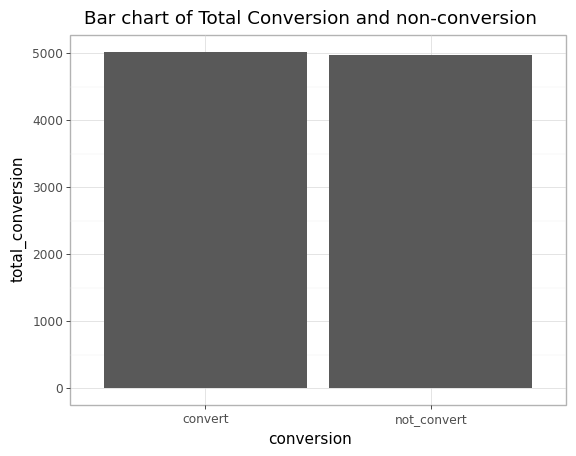

<ggplot: (8769085497417)>

In [541]:
(ggplot(conversion_total, aes(x='conversion', y='total_conversion'))
 + geom_col(stat = 'identity') + ggtitle('Bar chart of Total Conversion and non-conversion') + theme_light()
)

### Estimating C1
After estimating conversion and non-conversion, C1 needs to be estimated. This can be considered as one of the major KPI for the period. 

#### C1 formula
С1 = [N of contracts signed] / [N of Demo requests]

In [544]:
## The [N of Demo requests] is estimated below

request_total = conversion_total['total_conversion'].sum()
request_total

10000

In [216]:
## C1 
C1 = conversion_total.iloc[[0],[1]] / request_total
C1
C1.rename(index=str, columns={"total_conversion": "C1"})


,C1
0,0.5018


#### Thus, C1 is estimated to be 0.5018.

It is concluded that conversion rate in percentage terms if 50.2%



#### Disaagregating conversion for indepth analysis
In order to better understand conversion, there is the need to explore the data based on certain dimensions. 


In [558]:
### group data based on company type and count total conversion for eash 
company_conversion = df_dplyselect >> siuba.group_by(_.company_group, _.conversion) >> siuba.summarize(total_count = _.conversion.count())
company_conversion


,company_group,conversion,total_count
0,Others,convert,2446
1,Others,not_convert,2470
2,company_A,convert,1027
3,company_A,not_convert,1039
4,company_B,convert,1545
5,company_B,not_convert,1473


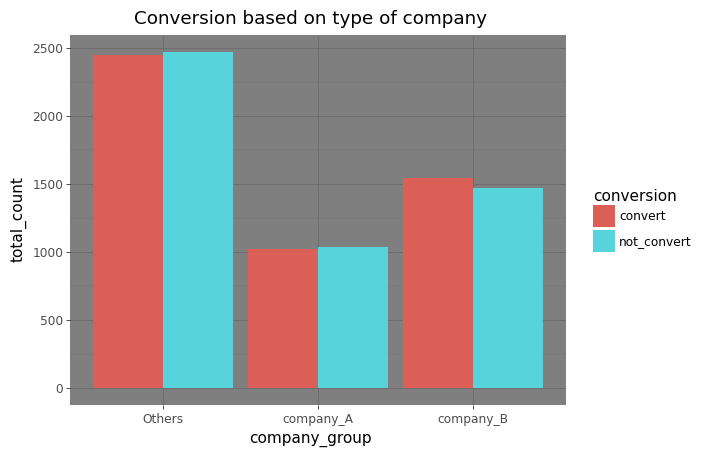

<ggplot: (8769085522255)>

In [586]:
(ggplot(company_conversion, aes(x='company_group', y='total_count', fill='conversion'))
 + geom_col(stat='identity', position='dodge')) + theme_dark() + ggtitle('Conversion based on type of company')

#### From our research questions and hypothesis, conversion based on sales script type is will offer valuable insight hence the data is grouped and conversion is estimated and visualized for the different sales group before testing their hypothesis further.

In [560]:
## group data based on type of sales script and count total conversion 
script_conversion = (df_dplyselect
 >> siuba.group_by(_.sales_script_type, _.conversion)
>> siuba.summarize(total_conversion = _.conversion.count())
)

script_conversion

,sales_script_type,conversion,total_conversion
0,script_A,convert,3320
1,script_A,not_convert,3237
2,script_B,convert,1638
3,script_B,not_convert,1692
4,script_C,convert,60
5,script_C,not_convert,53


#####
The result of the table can be visualize below



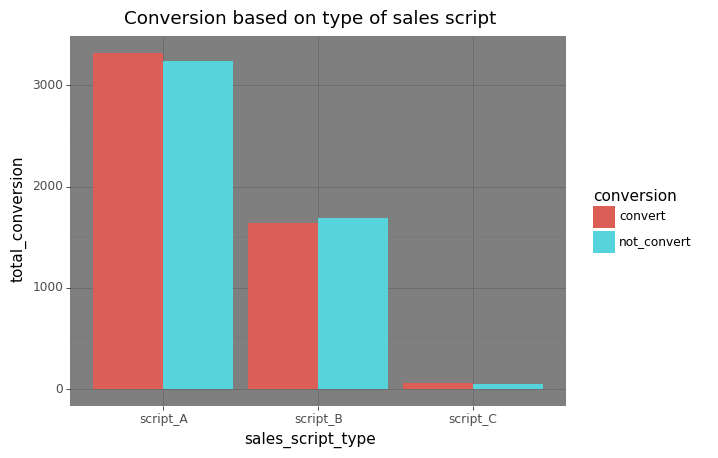

<ggplot: (8769085181730)>

In [561]:
### Plot the total conversion based on script type

(ggplot(script_conversion, aes(x='sales_script_type', y='total_conversion', fill='conversion'))
 + geom_col(stat='identity', position='dodge')) + theme_dark() + ggtitle('Conversion based on type of sales script')

##### Insights from the visuals
Illustrating conversion based on script type shows that both script A and script C made a higher conversion compared to non-conversion. Script A made 83 more conversions than non-conversion while script C made 7 more conversion than non-conversion. On the contrary, script B made 54 less conversions compared to non-conversion.

While this difference gives a clue about performance of the various script, it does not enables us to make decisive conclusion but guesses of what the difference could result in. Foreinstance, the total conversion is summation and hence the difference could be the result of number of demo sessions that a script has been used for. Clarity needs to brought to such guessetimates by considering their mean through further analysis

In order to make a data driven decision, hypothesis need to be tested to derive better understanding base on statistical significance.





### Objective 1

To test the hypothesis that there is statistically significant relationship between type of sales script and conversion.

Proceeding from the insights gained, this section tests the hypothesis for the first objective

H0 Conversion is independent of type of sales script used

H1 Conversion is dependent on type of sales script used

#### Method of analysis
Chi squared test of independence is appropriate for assessing whether there is a relationship between two categorical variable hence used. The procedure involves producing a contigency table and using that for the analysis. This is demonstrated below.

##### Contigency table

In [563]:
## contigency table between sales script type and conversion

conversion_script_type_contengency = pd.crosstab(df_dplyselect['sales_script_type'], df_dplyselect['conversion'])

conversion_script_type_contengency


conversion,convert,not_convert
sales_script_type,,
script_A,3320,3237
script_B,1638,1692
script_C,60,53


In [574]:
### chi-square test of independence
chi_square_result = stat()

chi_square_result.chisq(df=conversion_script_type_contengency)

print(chi_square_result.summary)




Chi-squared test for independence

Test              Df    Chi-square    P-value
--------------  ----  ------------  ---------
Pearson            2       2.23037   0.327855
Log-likelihood     2       2.23068   0.327804



### Results for objective one

With a p-value of 0.3279 being greater than 0.05 (5% significance level), it is
suggested that there is no statistically significant relationship between type of sales script and
conversion. Thus, we fail to reject the null hypothesis of independence based on available evidence.

This result has an added twist to it, which is that, there is the possibility of a change in result when more and better data is acquired.


A major research gap that remains is whether the differences in conversion between scripts as deduced from the bar plots is significant. This requires the need to test another hypothesis hence research objective 2.


### Research objective 2: To test the hypothesis that difference in mean conversion among sales script are equal

In order to test this hypothesis, there is the need to have continuous varaible. For this, the total number of conversions on daily basis can analyzed and used as a continuous variable. The rational for estimating daily total conversions instead of monthly or yearly is to ensure that there are enough data points to make statistical inference.

The available data covers only a year and a couple of days, hence daily conversions is a logical timeframe for estimating total conversion. 

By this, the dataset needs to be grouped based on days and the sum of conversions estimated for each sales script type. The question that arise is how are the conversions to be counted? For this, 'is_signed' variable is used; where its boolean data type (true or false) are treated as intergers with 1 counted as a single conversion and 0 as no conversion for each demo session. This allows for the total daily conversion to be estimated.

Another question is, which of the dates should be used as a basis for counting the total daily conversion? For this, the demo_appointment_datetime variable was used. This is based on the context that 'during and after the demo session, the sales manager tries to convert the potential client into a contract signing' hence the assumption that the impact of the script used on conversion came into effect on the demo appointment day.


It is assummed that the date used will be of less relevance for testing the hypothesis despite there could changes in the total number of daily conversion for scripts when the date is change. But the impact is assummed to be negligible and again, less relevant to some extent. 

###### Key assumption
1. The assumption was made that all sales scripts had equal chance of being used during a demo session. 

2. There were no cases of repeated sessions where scripts were used again.


In [570]:
### select various columns and split the demo appointment column into date and time
df_grp = (df >> siuba.select(_.demo_appointment_datetime, _.request_to_1streach_timelength_minutes_, 
                  _.conversion, _.company_group, _.sales_script_type, _.is_signed)>>
siuba.separate(col = _.demo_appointment_datetime, sep = ' ', into = ('demo_appointment_yyyymmdd', 
                                                                     'demo_appointment_hhmmss')) >>
 siuba.group_by(_.demo_appointment_yyyymmdd, _.sales_script_type)
)

## sum the total conversion for each script on each day
df_grp_sum = df_grp >> siuba.summarize(total_conversion = _.is_signed.sum())
df_grp_sum.head(5)

,demo_appointment_yyyymmdd,sales_script_type,total_conversion
0,2019-12-28,script_A,0
1,2019-12-28,script_B,2
2,2019-12-29,script_A,0
3,2019-12-29,script_B,1
4,2019-12-30,script_B,1


#### Visualizing the total conversion on demo day for the various scripts

First, the distribution of total conversion based on sales script is visualized using boxplot which shows the mean conversion for sales scripts as well as the minimum, 25th quartile, 75th quartile and maximum. 


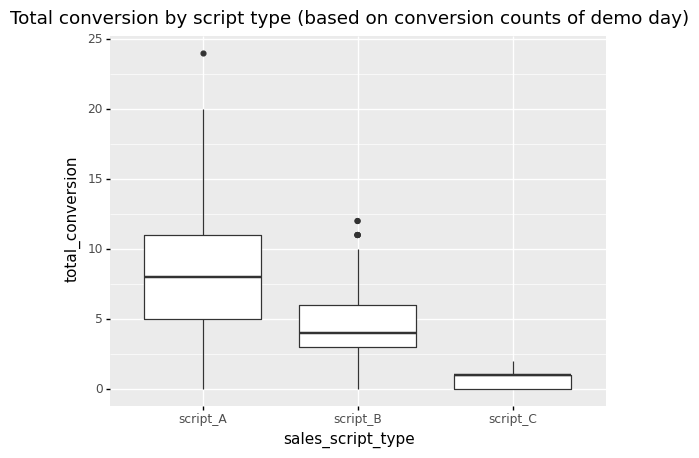

<ggplot: (8769078937661)>

In [310]:

(ggplot(data = df_grp_sum, mapping = aes(x = 'sales_script_type', y = 'total_conversion'))+ geom_boxplot() + 
 ggtitle('Total conversion by script type (based on conversion counts of demo day)')) 







#### Insights from boxplot of total conversions based on demo date 

From the boxplot, some points which are outside the normal range of the plot can be regarded as outliers. However, they are not remove for now. Moreover the difference in conversion between scripts is clearer with the boxplot. It is deduced that script C has the lowest average conversion while script A has the highest.


#### Visual inspection: Testing statistical assumptions for the analysis of hypothesis

Before deciding on the statistical method to use to answer the business questions, there is the need to verify that statistical assumptions hold true for the data. For valid statistical inference to be made about our target market based on our current of clients it is very important that appropriate methods are used. The appropriateness of the method is not a guesswork but one informed from both visual and statistical test. 


Generally, there are two family of statistical techniques that can be employed in analyzing the data. Namely, Parametric and non-parametric methods. The parametric methods usually have a greater statistical power but this comes at the cost of requiring the data to meet a number of assumptions for proper insights to be gain. Given that, our aim is to present the possible best solution, the assumptions for using a parametric method are tested first before considering their use or otherwise.

#### Visual inspection of normality 

To use a parametric method, normality of data distribution of is assummed. A simple approach to verifying this is with the aid of histogram





<AxesSubplot:xlabel='total_conversion', ylabel='Count'>

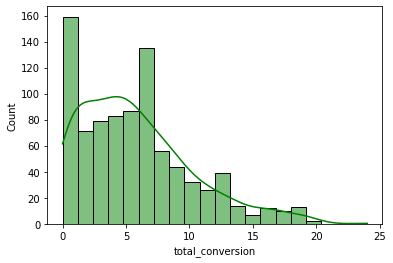

In [360]:
sns.histplot(df_grp_sum['total_conversion'], bins=20, kde=True, color='g')

#### Results of the histogram

The histogram plotted above does not necessarily answer the question on normality assumption. Nonetheless, it is one of several visualization techniques that gives clues. 

From visual inspection, the distribution is right-tailed hence a right-skewed or positive-skewed distribution. 


### Q-Q plot for visualizing normality
In order to gain a better view on the normality of the distribution, a Q-Q plot is use to compare actual total conversion to an expected value in a normal distribution. The yardstick for detecting normality will be to verify that the actual data distriubtion are linearly along a straignt 45 degrees diagonal line. The result is illustrated below.


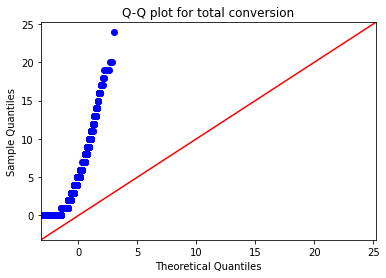

In [571]:
### QQ-PLOT
sm.qqplot(df_grp_sum['total_conversion'], line = '45')

plt.title('Q-Q plot for total conversion')
plt.show()

### Insights from Q-Q plot

From the Q-Q plot, it is deduced that the dataset deviates from the line of expected normal distribution hence heavily skewed. While the visualization so far points to the direction of a non-normal distribution, there is still the opportunity to cross-check these suggestions with some statistically test for normality. 


### Statistically test for normality:  Shapiro-Wilk test of normality

The visual inspections are supported with Shapiro-Wilk test to test the hypothesis that the distribution of data is not different from an expected normal distribution. 

In [371]:
#### Shapiro-Wilk test

w, pvalue = stats.shapiro(df_grp_sum['total_conversion'])
print(w, pvalue)


#w, pvalue = stats.shapiro(script_anova.anova_model_out.resid)
#print(w, pvalue)

0.9258275032043457 2.6858449476433106e-20


#### Calculating normality

This another approach is to assessing normality using the pingouin module.

In [387]:
pg.normality(df_grp_sum, group='sales_script_type', dv='total_conversion')

,W,pval,normal
script_A,0.977832,8.848897e-06,False
script_B,0.960671,1.573736e-08,False
script_C,0.745857,1.854471e-11,False


#### Insight from Shapiro-Wilk test of normality

The p-value of the test is less than 0.05 (5% significance level) which suggests a statistically significant difference from a normal distribution. Thus, the null hypothesis is rejected. This is not one of the relevant hypothesis to be tested for our products but its gives us an important clue as to the right statistical method to adopt for assessing our business relevant hypothesis.

With the data failing to meet the assumption of normal distribution required for the adoption of a parametric method, the compass of the analysis is gearing towards a non-parametric method. But before ascertaining that, there is the need to test for other assumptions required such as homogeneity which stipulates that variance between categories to analyzed should be equal across the data distribution for methods such ANOVA to be properly use. 


### Statistical test for homogeneity
#### Bartlett’s test 

The first approach being used to test for equal variance in the distribution is the Bartlett's test. Given that the distribution is non-normal, Barlett's test is supported with Levene's test which is a much more robust test when the data is not a normal distribution.



In [372]:
### bartlett's test for homogeneity
script_bartlett = stat()
script_bartlett.bartlett(df = df_grp_sum, res_var = 'total_conversion', xfac_var = 'sales_script_type')
script_bartlett.bartlett_summary

,Parameter,Value
0,Test statistics (T),425.8573
1,Degrees of freedom (Df),2.0000
2,p value,0.0000


##### Insight from the Bartlett's test
The bartlett test result shows a p-value that is statistically significant hence the hypothesis that variation in the distribution is equal is rejected. This points in the direction of a non-parametric approach for the analysis but before then the result needs to be verified with a Levene's test.

### Levene's statistical test for homogeneity

Levene's test is employed as a final approach in this context to verify whether not the variance in the data is equal.





In [572]:
## levene test
script_lev = stat()
script_lev.levene(df = df_grp_sum, res_var='total_conversion', xfac_var = 'sales_script_type')
script_lev.levene_summary



,Parameter,Value
0,Test statistics (W),119.2498
1,Degrees of freedom (Df),2.0000
2,p value,0.0000


In [573]:
### Usingthe pingouin module for the analysis

pg.homoscedasticity(df_grp_sum, group='sales_script_type', dv='total_conversion')

,W,pval,equal_var
levene,119.249752,1.772745e-46,False


### Insight from Levene's test
The levene's test depict an unequal variance with a statistical significant p-value < 0.05 (at 5% significant level) hence confirming Bartlett's test.



## Conclusion drawn from testing of statistical assumptions

With visual inspections and all statistically tests indicating the data has a non-normal distribution and variance of values are unequal, the statistical approach adopted for testing the various relevant hypothesis devised is a non-parametric one. 



## Kruskal-Wallis test

After finally deciding on the type of statiscal approach to adopt, a selection is made among several non-parametric methods. For this, consideration is given to the number of categories or groupings in the independent variable. Three types of sales scripts were identified in the datset hence the decision to use 
Kruskal-Wallis test for the analysis of the second objective.


In [376]:
pg.kruskal(data=df_grp_sum, dv='total_conversion', between='sales_script_type')

,Source,ddof1,H,p-unc
Kruskal,sales_script_type,2,338.713092,2.814406e-74


### Results
The p-value from the Kruskal-Wallis test is statistically significant at 5% significant level which suggests the null hypothesis that conversion among the differenct scripts is rejected.



### Conclusion on objective 2
The objective 2 seeks to test the hypothesis that all sales scripts produce equal conversions without statistically significant difference. The conclusion drawn is to reject this hypothesis. This can be seen as a breakthrough from the exploratory data analysis yet this results equally raise another enquiry. Though, it is now clear that at least one sales script seems to do better than another for conversion, the analysis does not indicate which sales scripts has a higher conversion and how they differ. This calls for further analysis in the form of post-hoc test.



### Recommendation on objective 2

With the suggestion that sales script donot produce equal conversions, it is recommended that, a deliberate effort is made to choose the script with higher rate of conversion. While this recommendation indicates there is opportunity to prioritize sales scripts for higher conversion, it has not specifically suggested which sales script in particular should be used. To provide such a data driven recommendation, further analysis is required to determine which script should be used to maximize conversion.



### Objective 3: To identify which sales script produces higher total conversions on the average

Post-hoc test is used to satisfy this objective. It provides a better insight through a pairwise comparison of the significant level of differences in conversion between scripts and further identify which scripts are assosiated with higher conversion.


In [576]:
### Post-hoc test with Dunn

sp.posthoc_dunn(a = df_grp_sum, val_col = 'total_conversion', group_col = 'sales_script_type', p_adjust='bonferroni')


,script_A,script_B,script_C
script_A,1.000000e+00,9.195689e-30,5.152029e-66
script_B,9.195689e-30,1.000000e+00,3.801421e-23
script_C,5.152029e-66,3.801421e-23,1.000000e+00


### Result of post-hoc test of difference in conversion

The post-hoc test based on Dunn test indicates that there are significant differences in conversion between all the sales scripts and not just at least one. The p-value for the pairwise difference between all the scripts are statistically significant. The result shown above only captures the p-values and in order discern the difference better, another module is used for the estimation.

In [577]:
## Post-hoc test with means of script among other feature output
pg.pairwise_ttests(dv='total_conversion', between='sales_script_type', data=df_grp_sum, parametric = 'false',
                  alpha = 0.05, padjust = 'bonf', return_desc = 'true').round(3)

,Contrast,A,B,mean(A),std(A),mean(B),std(B),Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,sales_script_type,script_A,script_B,8.342,4.781,4.333,2.342,False,false,14.944,583.709,two-sided,0.0,0.0,bonf,1.127e+41,1.055
1,sales_script_type,script_A,script_C,8.342,4.781,0.638,0.602,False,false,31.116,443.551,two-sided,0.0,0.0,bonf,9.194e+113,1.784
2,sales_script_type,script_B,script_C,4.333,2.342,0.638,0.602,False,false,27.265,469.572,two-sided,0.0,0.0,bonf,6.315e+94,1.745


#### Interpretation of post-hoc rest results

From the post-hoc test results, the mean of script B is 4.333, mean of script A is 8.342 and the mean of script c is 0.638. The results suggests sales script A has a significantly higher conversion than sales script B and C. In a similar manner, sales script B has a significantly higher conversion than script C in statistical terms.

### Conclusion drawn for objective 3

The third objective seeks to assess whether difference in conversion is statistically significant and identify which sales script has a significantly higher conversion. The results based on available data suggests that on a given demo day, the number of conversion that sales script A will produce is on the average, significantly higher than the other script types hence should be prioritize in our efforts to increase conversion


### Recommendation for objective 3

The sales team should consider prioritizing script A as the best bet to attain a higher conversion rate. 

## Objective 4: Assessing factors that influence the likelihood of a client to convert

The fourth objective of the product analysis is to move a step further and assess our data with focus on predicting how various factors influence the probability of a client signing up for our product. In order to achieve the goal of higher amount of conversion, as assessment is undertaken to model whether or not a client will sign-up. Knowing how these factors influence client's decision to purchase our service will enable us better target clients by managing such predictors well. For this, a review of the various variables available has been undertaken to identify potential predictors. 

The business problem at hand can be translated into an analytical one that requires a classification solution. In this case, the aim is to classify clients into two groups of convert and non-convert. This is the outcome we seek to predict hence the response or dependent variable. The response variable has two categories or classes as indicated, conversion and non-conversion, hence a regression analysis that caters for such characteristics is chosen. 


### Method: Logistic regression
Logistic regression will be used for assessing how various factors influence the probability of a client deciding to convert.

Based on the available limited data guided with domain knowledge of the business operations, the potential predictors identified for the analysis are the following

1. Type of sales script
2. Company type

###  Description of predictors and rational for their selection

1. The relationship between the type of sales script and conversion has been our main focus for earilier analysis and yet it is still important to understand how they influence the actual decision to convert and not the total number of conversion this time round. It can be presume, as it is the case to hypothesize, that there is a logical understanding of type of sales script being a potential influential determinant.

2. Company type as a potential predictor is based on the assumption that the characteristics of the company will determine its decision to finally purchase our product. Given that, these features are not adequately disclosed, the difference in labelling of company type is taken to be directly related to difference in company characteristics.



### Data treatment / preprocessing 
Some predictors have receive a special focus different from earlier, in order to prepare the variables into an acceptable format for modeling. It is worthing highlight such instances for transparency and reproducability of the analysis.

First of all, the company type variable had two categories being 0 and 1, and several missing data in the original dataset. In this case, it is possible that the missiing data was just an instance of unavailable data that was not provided due to some privacy concerns. Moreover, as much as 4,916 missing data is identified in the original dataset which constitutes a sizeable part of the dataset to eliminte from the analysis and very likely to reduce the possibility of capturing as much variations as the reality is on the ground. Supported by this, is the fact that, such a large amount of missing data is enough to constitute a category in its own right for analysis and insight. Based on these available information and context, the decision was made to replace all instances of missing data for company type with 'Others' as another company type. This led to reclassification of company type into company group A, B and Others corresponding to 0, 1 and missing data respectively;




In [507]:
### Logistc regression

#df_dplyselect.info()

#### Remove all negative values in request_to_1streach_timelength_minutes_
log_data = df_dplyselect#>> siuba.filter(_.request_to_1streach_timelength_minutes_ > 0)
#log_data.info()



In [578]:
### make dummy variables for categorical variables with more than 2 classes

logdata_dummy = pd.get_dummies(df_dplyselect, prefix_sep='_', drop_first=True)

logdata_dummy



,is_signed,request_to_1streach_timelength_minutes_,conversion_not_convert,sales_script_type_script_B,sales_script_type_script_C,company_group_company_A,company_group_company_B
0,0,1080.707589,1,0,0,0,1
1,0,213.984909,1,0,0,0,0
2,0,4763.120070,1,1,0,0,0
3,0,141.634140,1,0,0,1,0
4,0,1321.721628,1,0,0,0,0
...,...,...,...,...,...,...,...
9995,0,1737.906012,1,0,0,0,1
9996,1,610.876292,0,0,0,0,1
9997,1,1156.071455,0,0,0,0,0
9998,0,72.615677,1,0,0,0,1


In [595]:
## Select columns for dependent and independent varible
y = logdata_dummy['is_signed']

X = logdata_dummy.drop(columns=['conversion_not_convert', 'is_signed', 'request_to_1streach_timelength_minutes_'])


In [596]:
## Split data into training and validation dataset
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)




In [597]:
## Fit logistic regression on training dataset

pg.logistic_regression(train_X, train_y)

,names,coef,se,z,pval,CI[2.5%],CI[97.5%]
0,Intercept,-0.026989,0.041028,-0.657816,0.510656,-0.107403,0.053425
1,sales_script_type_script_B,-0.049030,0.055341,-0.885964,0.375637,-0.157495,0.059436
2,sales_script_type_script_C,0.243650,0.238120,1.023226,0.306201,-0.223056,0.710357
3,company_group_company_A,0.045234,0.067798,0.667187,0.504653,-0.087648,0.178115
4,company_group_company_B,0.103170,0.059694,1.728315,0.083932,-0.013828,0.220169


###### Assessment of the model performance and using it for prediction based on the validation dataset is provided as a dashboard in a web application. The analysis this far has satisfied the objective set-out

### Insights from multiple logistic regression

The logistic regression for predicting the probability that a client will sign-up produced a non-significant p-value for all cases. Script A was used as reference point for script B and C. Thus, with a co-efficient of -0.049 for script B, it is suggested that using script B results in a decrease in the log odds of signing a client by 0.049 in comparison to script A. This is however statistically insignificant. Script C has a co-efficient of 0.24 which suggests that when a sales manager uses script C, the log odds of signing a client increases by 0.24 compared to script A which is statistically insignificant.


With regards to prioritizing companies to reach out to in order to increase conversion, when sales managers take a session with company A or company B, the log odds of landing a conversion increases compared to when they target companies categorized as 'Others' in this analysis. The result is however statistically insignificant.


### Recommendation for objective 4

From the analysis undertaken, it is recommended that the sales team consider not prioritizing demo sessions with company type 'Others'. This should however not be treated as a de facto discrimination favouring company A and B to increase conversion given that the results are statistically insignificant.  

### Recommendation on improving data collection for better analytics of greater statistical power

Some potential predictors that could be included in the model are available in the dataset but the data format or how it is organized is not suitable for further transformation and inclusion in the model. I will highlight them and suggest how to organized such data to be used. This is intended to lay a foundation for a cross-functional and collaborative teamwork with other departments that generate data to be analyze.

source* - marketing source of the lead. This variable is very important in order to gain insight into
the effectiveness of marketing strategy in producing conversion. Currently, the variable has 28
unique categories which requires that they are classified into logical groups of similarity, for instance
organic source, referral, direct or indirect soruce, in order to be used as a categorical predictor. Given that actual names of the source have been hashed, such exercise is currently not possible hence the exclusion of this potential predictor. Thus, it is recommended that the actual names of the marketing source be provided to consider the possibility of using them as potential predictors.

sales_group_name* The type of sales team is likely to be a potential predictor influencing
conversion. This variable has 22 categories which needs to be grouped in order to be used a categorical
predictor. To do this, there is the need to provide further description about the various groups in order to classify them into logical groups for predicting conversion.

## Summary on the product analysis

This analysis set-out to provide data-driven evidence to support decision making by the product team with the aim of increasing conversion. 

A major tool that the sales team use to aid conversion is sales script of which there are different variant. Thus, the main focus of the analysis is assess the role of sales script as a driver of conversion among others. To achieve this, there was initial conceptualization of the business problem which translated into several hypothesis. 

Among others, the analysis sought to test the hypothesis that there is statistically significant relationship between type of sales script and conversion and that there is statistically significant difference in the total conversion made using different script. Further, the analysis sought to assess how sales script and company type influences the likelihood of a company signing up during and after a demo session.




### What should we pay attention to

1. It is recommended that sales script A be prioritized when deciding on the type of sales script to use for a demo. This is informed by the fact that sales script A had a statistically significant higher conversions on the average compared to the other scripts. It should be noted that even though the multiple logistic regression suggested that the odds of signing up slightly increases in favour of script C, this result was not statistically significant. Moreover, other variables such as company type may have contributed as a confounding factor

2. It is recommended that sales script B be given a higher priority in comparison to script C for use in demo session in order to increase overall conversion. 



### What should we do next

1. The analysis has underscored that while it was possible to derive insights from the available data, there is the need to include other potential predictors in the data collected. This is informed by the fact that, the models developed (shared on the web app) does not adequately explain the variation in conversion rate. This in addition to other recommendations provided will set-up Envio on the path to strong data driven decision making to increase conversion




#### WEB APP FOR THE TIME SERIES ANALYSIS IN PREDICTIVE MODELLING

#### BONUS WORK
In addition to the report available here, a simple dashboard for interactive visualization of KPI such as Conversion rate, time series analysis, forecasting conversion and predicting conversion has been developed

Please, access the web app for the rest of the analytics https://agbleze.shinyapps.io/Envio-Product-analytics/